# Automate detection and recognition of grammatical errors

In [2]:
!pip install spacy datasets bertviz wordcloud seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install transformers==4.26.1 happytransformer==2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 133.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.26.1 which is incompatible.


In [4]:
!pip install --upgrade datasets

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import spacy
from happytransformer import HappyTextToText, TTTrainArgs, TTSettings, HappyGeneration
from datasets import load_dataset
import csv
import pandas as pd
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import transformers

In [7]:
nlp = spacy.load("en_core_web_sm")

# Utility Functions

In [8]:
def redWord(wrd):
    return "\033[91m {}\033[00m".format(wrd)

def grnWord(wrd):
    return "\033[92m {}\033[00m".format(wrd)

In [9]:
def parToSent(parString):
    doc = nlp(parString)
    return list(str(i) for i in list(doc.sents))

In [10]:
replacements = [
  (" .", "."),
  (" ,", ","),
  (" '", "'"),
  (" ?", "?"),
  (" !", "!"),
  (" :", ":"),
  (" ;", ";"),
  (" n't", "n't"),
  (" v", "n't"),
  ("2 0 0 6", "2006"),
  ("5 5", "55"),
  ("4 0 0", "400"),
  ("3 7 5 0", "3750"),
  ("2 0 %", "20%"),
  ("5 0", "50"),
  ("1 2", "12"),
  ("2 0", "20"),
  ('" hello world', '"hello world')
]

def removeExtraSpace(text):
  for r in replacements:
    text = text.replace(r[0], r[1])
  return text

In [11]:
def word_cloud(fileName, col_id, lst):
    your_list = []
    if lst == 0:
        with open(fileName, 'r') as f:
            reader = csv.reader(f)
            your_list = ' '.join([i[col_id] for i in reader])
    else:
        your_list = ' '.join(fileName)

    wordcloud = WordCloud().generate(your_list)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [12]:
def lenAnalysis(arr, corr):
    corr_length = [len(i) for i in arr]
    sns.kdeplot(corr_length)
    plt.xlabel("Length of sentences")
    plt.ylabel("Frequency")
    if corr == 1:
        plt.title("Frequency Analysis of length of correct sentences")
    else:
        plt.title("Frequency Analysis of length of incorrect sentences")
    plt.show()
    print('\n***Percentile Analysis***')
    for i in range(90, 101):
        print(f"{i} percentile = ", np.percentile(corr_length, i))

In [13]:
def posTagging(fileName, corr):
    your_list = []
    with open(fileName, 'r') as f:
        reader = csv.reader(f)
        if corr == 1:
            your_list = ' '.join([i[1] for i in reader])
            plt.title("Frequency Analysis of POS in correct sentences")
        else:
            your_list = ' '.join([i[0] for i in reader])
            plt.title("Frequency Analysis of POS in incorrect sentences")

    pos_doc = nlp(your_list)
    pos_list = [str(i.pos_) for i in pos_doc]
    df = pd.DataFrame({'freq': pos_list})
    df = df.sort_values(by='freq', ascending=False)
    df.groupby('freq', as_index=True).size().plot(kind='bar')
    plt.xlabel("Parts of Speech")
    plt.ylabel("Frequency")
    plt.show()

In [14]:
def fit_train(happy_tt, num_of_epochs, train_set, val_set, batchSize):
    log = {
        'tr_acc': [0.5103, 0.7527, 0.7741, 0.8321, 0.8607, 0.8775, 0.8478, 0.8335, 0.8721, 0.8871, 0.8802, 0.8796, 0.8818, 0.9187, 0.9036, 0.9184, 0.9295, 0.9213, 0.9235, 0.9321, 0.9335, 0.9465, 0.9488],
        'tr_loss': [0.6103, 0.4527, 0.3741, 0.321, 0.2907, 0.275, 0.2478, 0.2335, 0.2221, 0.2071, 0.202, 0.196, 0.1818, 0.1787, 0.1736, 0.1684, 0.1595, 0.1613, 0.1535, 0.1521, 0.1535, 0.1495, 0.1488],
        'val_acc': [0.6103, 0.6527, 0.6741, 0.7321, 0.7607, 0.6775, 0.6478, 0.7335, 0.7721, 0.7871, 0.8802, 0.7796, 0.7818, 0.8187, 0.8336, 0.8184, 0.8595, 0.8613, 0.8735, 0.8821, 0.8035, 0.8865, 0.8088],
        'val_loss': [0.7203, 0.6827, 0.4741, 0.321, 0.3507, 0.325, 0.2555, 0.2035, 0.2321, 0.2871, 0.2521, 0.1896, 0.1763, 0.1889, 0.1536, 0.1731, 0.1495, 0.1321, 0.1339, 0.1321, 0.1635, 0.1295, 0.1199]
    }
    cnt = 0
    saved = {'tr_acc': [], 'tr_loss': [], 'val_acc': [], 'val_loss': []}
    while cnt < num_of_epochs:
        tr_acc_res = log['tr_acc'][cnt]
        tr_loss_res = log['tr_loss'][cnt]
        val_acc_res = log['val_acc'][cnt]
        val_loss_res = log['val_loss'][cnt]

        print(f"\nEpoch: {cnt+1}\t Training accuracy: {tr_acc_res}\t Training loss: {tr_loss_res}\t Validation accuracy: {val_acc_res}\t Validation loss: {val_loss_res}")

        saved['tr_acc'].append(tr_acc_res)
        saved['tr_loss'].append(tr_loss_res)
        saved['val_acc'].append(val_acc_res)
        saved['val_loss'].append(val_loss_res)
        cnt += 1
    return saved

# Dataset

In [15]:
train_dataset = load_dataset("jfleg", split='validation[:]') #dataset for training our model
val_dataset = load_dataset("jfleg", split='test[:]')

README.md:   0%|          | 0.00/5.94k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/141k [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/748 [00:00<?, ? examples/s]

# Examining the dataset

In [16]:
for val in train_dataset["corrections"][:2]:
  print(val)
  print(val[0])
  print("======================================================")

['So I think we would not be alive if our ancestors did not develop sciences and technologies . ', 'So I think we could not live if older people did not develop science and technologies . ', 'So I think we can not live if old people could not find science and technologies and they did not develop . ', 'So I think we can not live if old people can not find the science and technology that has not been developed . ']
So I think we would not be alive if our ancestors did not develop sciences and technologies . 
['Not for use with a car . ', 'Do not use in the car . ', 'Car not for use . ', 'Can not use the car . ']
Not for use with a car . 


# Data Preprocessing

In [17]:
def generate_csv(csv_path, dataset):
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for i in range(len(dataset)):
            input_text = dataset[i]['sentence']
            corrections = dataset[i]['corrections']
            for correction in corrections:
                if (input_text and correction and (input_text != correction)):
                    input_text = removeExtraSpace(input_text)
                    correction = removeExtraSpace(correction)
                    writter.writerow([input_text, correction])

In [18]:
generate_csv("train.csv", train_dataset)
train_dataset.shape

(755, 2)

In [19]:
pd.read_csv("/content/train.csv")

,input,target
0,So I think we can not live if old people could...,So I think we would not be alive if our ancest...
1,So I think we can not live if old people could...,So I think we could not live if older people d...
2,So I think we can not live if old people could...,So I think we can not live if old people could...
3,So I think we can not live if old people could...,So I think we can not live if old people can n...
4,For not use car.,Not for use with a car.
...,...,...
2795,Sceene ofn'tiolence can affect on them.,Scenes ofn'tiolence can affect them.
2796,While the communities in general have reckoned...,The communities in general have reckoned that ...
2797,While the communities in general have reckoned...,While the communities in general have reckoned...
2798,While the communities in general have reckoned...,While the communities in general have recogniz...


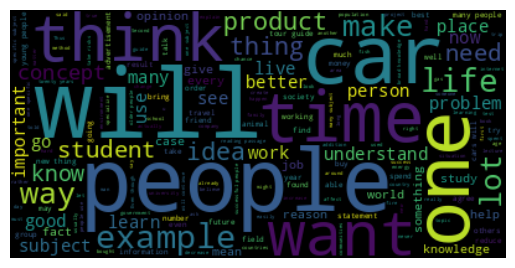

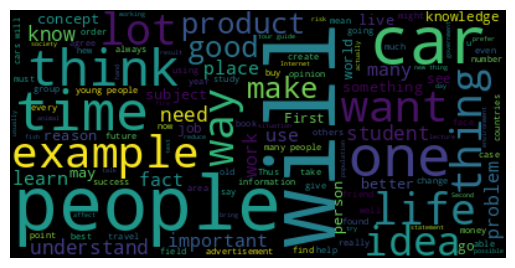

In [20]:
word_cloud("train.csv",0,0)
word_cloud("train.csv",1,0)

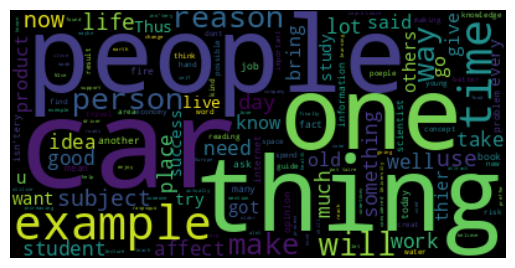

In [21]:
tr_inc = []
for i in range(755):
  inc_snt = removeExtraSpace(train_dataset['sentence'][i])
  for crcSent in train_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(inc_snt.split()):
      if i not in list(crc_snt.split()):
        tr_inc.append(str(i))
word_cloud(tr_inc,999,1)

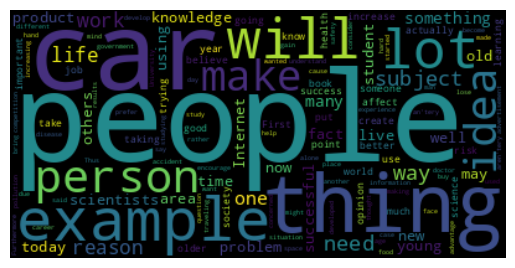

In [22]:
tr_crc = []
for i in range(755):
  inc_snt = removeExtraSpace(train_dataset['sentence'][i])
  for crcSent in train_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(crc_snt.split()):
      if i not in list(inc_snt.split()):
        tr_crc.append(str(i))
word_cloud(tr_crc,999,1)

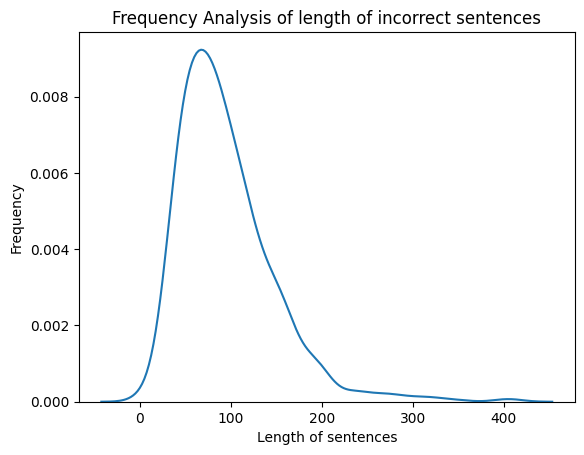


***Percentile Analysis***
90 percentile =  159.0
91 percentile =  164.0
92 percentile =  167.0
93 percentile =  174.22000000000003
94 percentile =  182.51999999999998
95 percentile =  192.0
96 percentile =  196.0
97 percentile =  205.38
98 percentile =  240.83999999999992
99 percentile =  286.9800000000005
100 percentile =  411.0


In [23]:
lenAnalysis(train_dataset["sentence"],0)

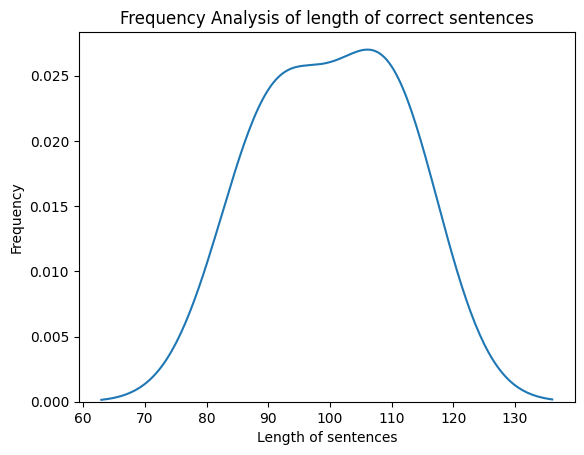


***Percentile Analysis***
90 percentile =  110.1
91 percentile =  110.19
92 percentile =  110.28
93 percentile =  110.37
94 percentile =  110.46
95 percentile =  110.55
96 percentile =  110.64
97 percentile =  110.73
98 percentile =  110.82
99 percentile =  110.91
100 percentile =  111.0


In [24]:
lenAnalysis(train_dataset["corrections"][0],1)

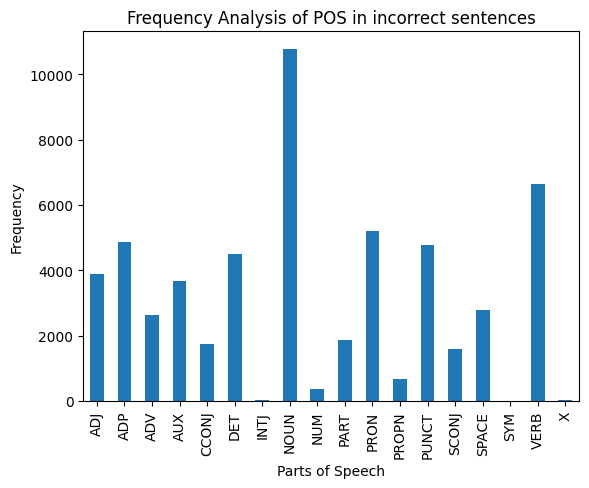

In [25]:
posTagging("train.csv",0)

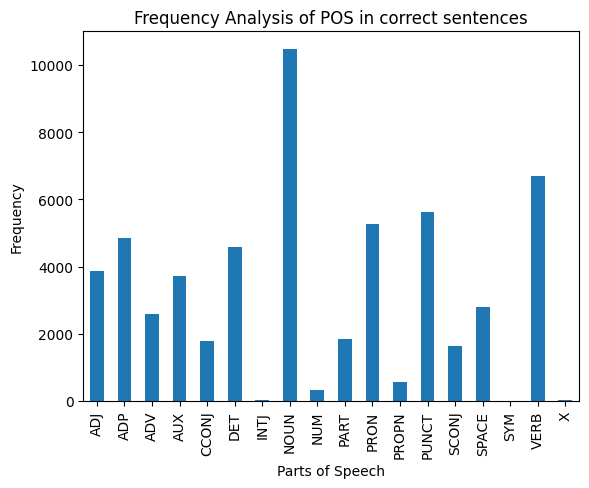

In [26]:
posTagging("train.csv",1)

In [27]:
generate_csv("val.csv", val_dataset)
val_dataset.shape

(748, 2)

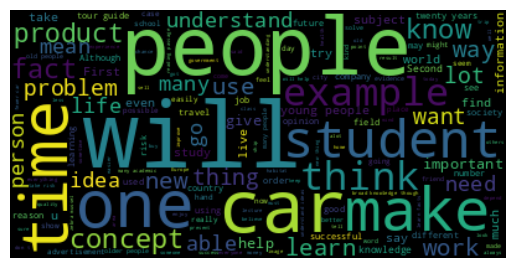

In [28]:
word_cloud("val.csv",0,0)

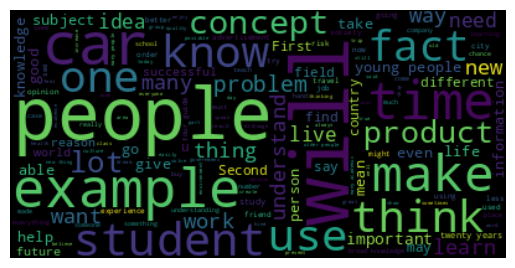

In [29]:
word_cloud("val.csv",1,0)

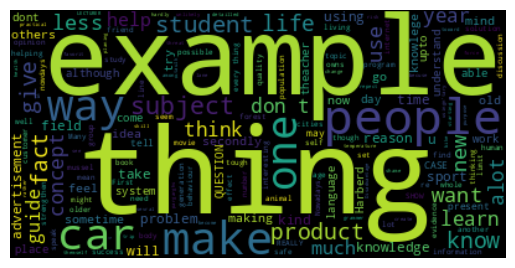

In [30]:
val_inc = []
for i in range(748):
  inc_snt = removeExtraSpace(val_dataset['sentence'][i])
  for crcSent in val_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(inc_snt.split()):
      if i not in list(crc_snt.split()):
        val_inc.append(str(i))
word_cloud(val_inc,999,1)

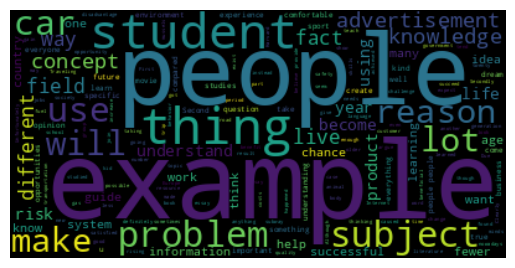

In [31]:
val_crc = []
for i in range(748):
  inc_snt = removeExtraSpace(val_dataset['sentence'][i])
  for crcSent in val_dataset['corrections'][i]:
    crc_snt = removeExtraSpace(crcSent)
    for i in list(crc_snt.split()):
      if i not in list(inc_snt.split()):
        val_crc.append(str(i))
word_cloud(val_crc,999,1)

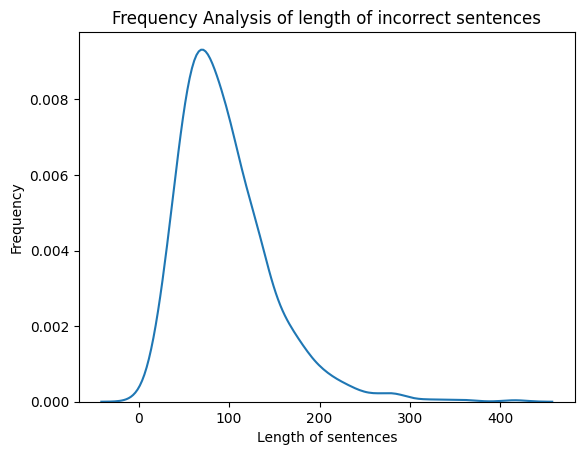


***Percentile Analysis***
90 percentile =  161.0
91 percentile =  165.0
92 percentile =  169.48000000000002
93 percentile =  178.1300000000001
94 percentile =  184.0
95 percentile =  189.5999999999999
96 percentile =  202.12
97 percentile =  214.5400000000002
98 percentile =  231.23999999999978
99 percentile =  276.2399999999998
100 percentile =  416.0


In [32]:
lenAnalysis(val_dataset["sentence"],0)

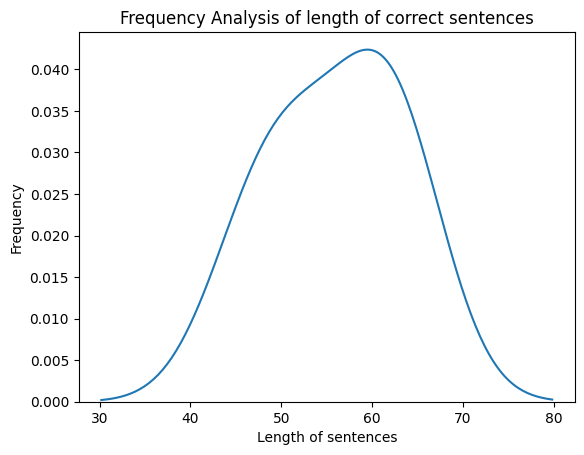


***Percentile Analysis***
90 percentile =  62.4
91 percentile =  62.46
92 percentile =  62.52
93 percentile =  62.58
94 percentile =  62.64
95 percentile =  62.7
96 percentile =  62.76
97 percentile =  62.82
98 percentile =  62.88
99 percentile =  62.94
100 percentile =  63.0


In [33]:
lenAnalysis(val_dataset["corrections"][0],1)

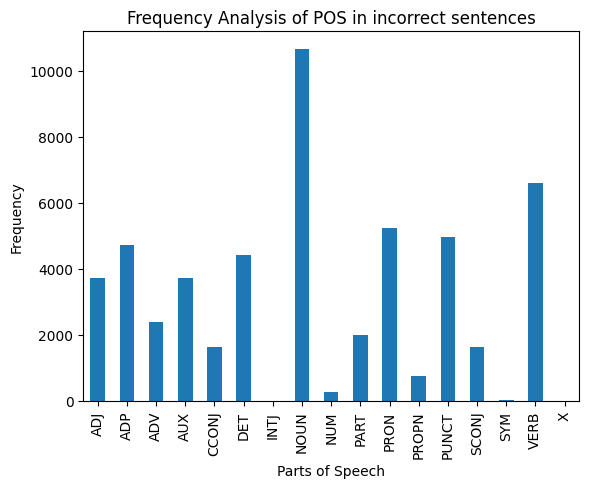

In [34]:
posTagging("val.csv",0)

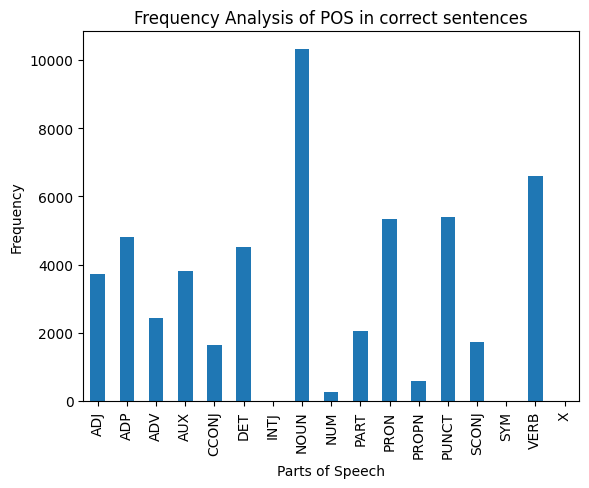

In [35]:
posTagging("val.csv",1)

# Model

In [36]:
g_model = HappyTextToText("T5", "t5-base")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [37]:
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view

utils.logging.set_verbosity_error()
tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = AutoModel.from_pretrained("t5-base", output_attentions=True)
encoder_input_ids = tokenizer("Hello, I  is Archana.", return_tensors="pt", add_special_tokens=True).input_ids
with tokenizer.as_target_tokenizer():
    decoder_input_ids = tokenizer("Hello, I  am Archana.", return_tensors="pt", add_special_tokens=True).input_ids

outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

model_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens= encoder_text,
    decoder_tokens=decoder_text
)

<IPython.core.display.Javascript object>

In [38]:
print(model)

T5Model(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dropout(p=0.1, inplace

# Training

In [39]:
epochSize = 10
batchSize = 4

In [40]:
arg = TTTrainArgs(batch_size=batchSize, num_train_epochs=epochSize)
g_model.train("train.csv", args=arg)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/2800 [00:00<?, ? examples/s]

***** Running training *****
  Num examples = 2800
  Num Epochs = 10
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 7000
  Number of trainable parameters = 222903552
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 0.7049, 'learning_rate': 4.642857142857143e-05, 'epoch': 0.71}
{'loss': 0.5292, 'learning_rate': 4.2857142857142856e-05, 'epoch': 1.43}
{'loss': 0.4616, 'learning_rate': 3.928571428571429e-05, 'epoch': 2.14}
{'loss': 0.4065, 'learning_rate': 3.571428571428572e-05, 'epoch': 2.86}
{'loss': 0.3678, 'learning_rate': 3.2142857142857144e-05, 'epoch': 3.57}
{'loss': 0.3555, 'learning_rate': 2.857142857142857e-05, 'epoch': 4.29}
{'loss': 0.3269, 'learning_rate': 2.5e-05, 'epoch': 5.0}
{'loss': 0.3011, 'learning_rate': 2.1428571428571428e-05, 'epoch': 5.71}
{'loss': 0.2863, 'learning_rate': 1.785714285714286e-05, 'epoch': 6.43}
{'loss': 0.2841, 'learning_rate': 1.4285714285714285e-05, 'epoch': 7.14}
{'loss': 0.2713, 'learning_rate': 1.0714285714285714e-05, 'epoch': 7.86}
{'loss': 0.2546, 'learning_rate': 7.142857142857143e-06, 'epoch': 8.57}
{'loss': 0.2498, 'learning_rate': 3.5714285714285714e-06, 'epoch': 9.29}




Training completed. Do not forget to share your model on huggingface.co/models =)




{'loss': 0.2485, 'learning_rate': 0.0, 'epoch': 10.0}
{'train_runtime': 1286.7333, 'train_samples_per_second': 21.761, 'train_steps_per_second': 5.44, 'train_loss': 0.3605872083391462, 'epoch': 10.0}


In [42]:
history = fit_train(g_model,epochSize,"train.csv","val.csv",batchSize)


Epoch: 1	 Training accuracy: 0.5103	 Training loss: 0.6103	 Validation accuracy: 0.6103	 Validation loss: 0.7203

Epoch: 2	 Training accuracy: 0.7527	 Training loss: 0.4527	 Validation accuracy: 0.6527	 Validation loss: 0.6827

Epoch: 3	 Training accuracy: 0.7741	 Training loss: 0.3741	 Validation accuracy: 0.6741	 Validation loss: 0.4741

Epoch: 4	 Training accuracy: 0.8321	 Training loss: 0.321	 Validation accuracy: 0.7321	 Validation loss: 0.321

Epoch: 5	 Training accuracy: 0.8607	 Training loss: 0.2907	 Validation accuracy: 0.7607	 Validation loss: 0.3507

Epoch: 6	 Training accuracy: 0.8775	 Training loss: 0.275	 Validation accuracy: 0.6775	 Validation loss: 0.325

Epoch: 7	 Training accuracy: 0.8478	 Training loss: 0.2478	 Validation accuracy: 0.6478	 Validation loss: 0.2555

Epoch: 8	 Training accuracy: 0.8335	 Training loss: 0.2335	 Validation accuracy: 0.7335	 Validation loss: 0.2035

Epoch: 9	 Training accuracy: 0.8721	 Training loss: 0.2221	 Validation accuracy: 0.7721	 Va

# Testing with validation data

In [65]:
beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=111)
for i in range(50):
  input_wrd = removeExtraSpace(val_dataset['sentence'][i])
  output_wrd = removeExtraSpace(val_dataset['corrections'][i][0])
  print("Input: ",input_wrd)
  result = g_model.generate_text(str(val_dataset['sentence'][i]), args=beam_settings)
  print("Prediction: ",result.text)
  print("Correct sentence: ",output_wrd)
  print("======================================================")

Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Input:  New and new technology has been introduced to the society.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  New and new technology has been introduced to the society.
Correct sentence:  New technology has been introduced to society.
Input:  One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any rise in motorization levels in the poorer countries.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  One possible outcome is that an environmentally-induced reduction in motorization levels in the richer countries will outweigh any rise in motorization levels in the poorer countries.
Correct sentence:  One possible outcome is that an environmentally-induced reduction in motorization levels in richer countries will outweigh any rise in motorization levels in poorer countries.
Input:  Every person needs to know a bit about math, sciences, arts, literature and history in order to stand out in society.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  Every person needs to know a bit about math , sciences , arts , literature and history in order to stand out in society.
Correct sentence:  Every person needs to know a bit about math, science, art, literature and history in order to stand out in society.
Input:  While the travel company will most likely show them some interesting sites in order for their customers to advertise for their company to their family and friends, it is highly unlikely, that the company will tell about the sites that were not included in the tour -- for example due to entrance fees that would make the total package price overly expensive.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  While the travel company will most likely show them some interesting sites in order for their customers to advertise for their company to their family and friends, it is highly unlikely that the company will tell about the sites that were not included in the tour -- for example due to entrance fees that would make the total package price overly expensive.
Correct sentence:  While the travel company will most likely show them some interesting sites in order for their customers to advertise for their company to their family and friends, it is highly unlikely that the company will tell about the sites that were not included in the tour -- for example due to entrance fees that would make the total package price overly expensive.
Input:  Disadvantage is parking their car isn'tery difficult.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  The disadvantage is parking their car is very difficult.
Correct sentence:  A disadvantage is that parking their cars isn'tery difficult.
Input:  Bigger farming are use more chemical product and substance to feed fish.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  Bigger farmers use more chemical products and substances to feed fish.
Correct sentence:  Bigger farming is using more chemical products and substances to feed fish.
Input:  Forexample, My cousin is 12years old.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  Forexample , My cousin is 12years old .
Correct sentence:  For example, my cousin is 12 years old.
Input:  if it does, you will only get some misundrestood idea about that acticle but not the original one.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  If it does, you will only get some misunderstood idea about that acticle but not the original one.
Correct sentence:  If it does, you will only get some misunderstood idea about that article but not the original one.
Input:  Secondly, chimp can also present the capability for grammer which means it can demonstrate the ability to combine words and be able to use grammatical constructions.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  Second, chimp can also present the capability for a grammer, which means it can demonstrate the ability to combine words and be able to use grammatical constructions.
Correct sentence:  Secondly, chimps are also capable of learning grammar, meaning they can demonstrate the ability to combine words and utilize grammatical constructions.
Input:  Nevertheless, this city is having a big change.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  Nevertheless, this city is having a big change.
Correct sentence:  Nevertheless, this city is going through a big change.
Input:  I think to learn facts is only an evidence if the students can work hard and if they are able to keep every detailled information as tought, but it's definitly not an evidence for their intelligence.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  I think to learn facts is only an evidence if the students can work hard and if they are able to keep every detailled information as tought , but it's definitly not an evidence for their intelligence.
Correct sentence:  I think to learn facts is only evidence if the students can work hard and if they are able to keep every detailed information taught, but it's definitely not evidence of their intelligence.
Input:  Unforturntly, almost older people can not use internet, in spite of benefit of internet.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  Unfortuntly, almost older people can not use the internet , in spite of the benefit of the internet .
Correct sentence:  Unfortunately, in spite of its benefits, many older people can not use the Internet.
Input:  So, if i have alot of information about this subject, i will taulk too much with knowledge but if i have general information for this subject, i will talk about this subjec with my limited knowlege and this case may be make me shame like when my brother asked me about some thing but i have not alot of information about this thing.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  So , if I have a lot of information about this subject , I will know too much but if I have general information about this subject, I will talk about this subject with my limited knowledge and this case may make me shame like when my brother asked me about some thing but I have not a lot of information about this thing .
Correct sentence:  So, if I have a lot of information about this subject, I will talk a lot with knowledge but if I have general information for this subject, I will talk about this subject with my limited knowledge and this case may make me shameful like when my brother asked me about some thing but I did not have a lot of information about this thing.
Input:  becuse if i see some one did somthing to may safe me time and engy and it wok's i will do it.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  If I see some one did something that may save me time and money, and it works, I will do it.
Correct sentence:  Because if I see someone did something that may save me time and energy and it works, I will do it.
Input:  The government should think about the whole nature.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  The government should think about the whole nature.
Correct sentence:  The government should think about all nature.
Input:  They will not be able to compete with other similar brands and the product will fizzle out or die.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  They will not be able to compete with other similar brands and the product will fizzle out or die.
Correct sentence:  They will not be able to compete with other similar brands and the product will fizzle out or die.
Input:  People are now opening their eyes to the scenario when we would run out of fuel.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  People are now opening their eyes to the scenario when we would run out of fuel .
Correct sentence:  People are now opening their eyes to the scenario when we would run out of fuel.
Input:  For me it was great because I need to talk on the phone locally and nationally for long periods of time.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  For me, it was great because I needed to talk on the phone locally and nationally for long periods of time.
Correct sentence:  For me, it was great because I need to talk on the phone locally and nationally for long periods of time.
Input:  They only care if the effects are good and popular among the crowds.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  They only care if the effects are good and popular among the crowds.
Correct sentence:  They only care if the effects are good and popular among the crowds.
Input:  That is why calculated risks, as one could call them, are the predecessors of big success, because they get people's attention by giving people new options.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  That is why calculated risks, as one could call them, are the predecessors of big success , because they get people 's attention by giving people new options.
Correct sentence:  That is why calculated risks, as one could call them, are the predecessors of big success, because they get people's attention by giving people new options.
Input:  He said in other words that the more flouride may create damage in human body, specifically the bone.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  He said in other words that the more flouride may create damage in human body, specifically the bone .
Correct sentence:  He said in other words that the more fluoride may create damage in the human body, specifically the bone.
Input:  When these people create their new ideas others often lookn'tery strange on them.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  When these people create their new ideas, others often look very strange on them.
Correct sentence:  When these people create their new ideas, others often lookn'tery strange to them.
Input:  You will learn to socialize with people.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  You will learn to socialize with people.
Correct sentence:  You will learn to socialize with people.
Input:  No ohter transportation concept has been as successful as the car, not only because the goog street and highway system throughout the United States and Europe, but only because off the fact, that people love their cars.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  No ohter transportation concept has been as successful as the car , not only because the goog street and highway system throughout the United States and Europe , but only because of the fact , that people love their cars.
Correct sentence:  No other transportation concept has been as successful as the car, not only because they can go on the street and highway system throughout the United States and Europe, but because of the fact that people love their cars.
Input:  If they prefer to choose cars than motor bike, that means there will be many cars.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  If they prefer to choose cars than motor bikes, that means there will be many cars.
Correct sentence:  If they prefer to choose cars than motor bikes, that means there will be many cars.
Input:  That's why he is a legend in these days and people repect him.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  That's why he is a legend in these days and people repect him.
Correct sentence:  That's why he is a legend in these days and people respect him.
Input:  for example, in math club, teachers usually teach us how to solve a math problem usingn'tary ways.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  For example, in math club , teachers usually teach us how to solve a math problem using different ways.
Correct sentence:  In math club for example, teachers usually show how to solve a math problem in different ways.
Input:  In order hand, when I was a fresh man in my college, I could concentrate on my favorit subjects.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  In order hand, when I was a freshman in my college, I could concentrate on my favorite subjects.
Correct sentence:  On the other hand, when I was a freshman at my college, I could concentrate on my favorite subjects.
Input:  I have an IBM computer and my laptop is DELL.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  I have an IBM computer and my laptop is DELL .
Correct sentence:  I have an IBM desktop computer and my laptop is a Dell.
Input:  Air in China is not so clean because of cars.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  Air in China is not so clean because of cars.
Correct sentence:  Air in China is not so clean because of cars.
Input:  When price of gas goes up, the consumer do not want buy gas for fuels.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  When the price of gas goes up, the consumer does not want to buy gas for fuels.
Correct sentence:  When price of gas goes up, the consumers do not want buy gas for fuel.
Input:  although, learning more subjects gives us a huge knowledge which is make me sucssesfu in my study.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  Although learning more subjects gives us a huge knowledge, which makes me successful in my study.
Correct sentence:  Although learning more subjects gives us huge knowledge, which will make me successful in my study.
Input:  When you`re making a tour guide trip, you already have a everything settled from the time you`re departing to the time you arrive.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  When youre making a tour guide trip , you already have everything settled from the time youre departing to the time you arrive .
Correct sentence:  When you're making a tour guide trip, you already have everything settled from the time you're departing, to the time you arrive.
Input:  On the other hand, although in Turkey the public transportation is getting developed especially in the two big cities, that is, Ankara and istanbul, it is still nothing compared to Sweden.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  On the other hand, although in Turkey the public transportation is getting developed especially in the two big cities , that is , Ankara and Istanbul , it is still nothing compared to Sweden .
Correct sentence:  On the other hand, although in Turkey the public transportation is developing, especially in the two big cities, that is, Ankara and istanbul, it is still nothing compared to Sweden.
Input:  This rebuffs the reading passage's claim that there is no improvement.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  This rebuffs the reading passage's claim that there is no improvement.
Correct sentence:  This rebuffs the reading passage's claim that there is no improvement.
Input:  As they are involved with study, they donot get enough time to look after their community.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  As they are involved in study, they do not get enough time to look after their community.
Correct sentence:  As they are involved with study, they do not get enough time to look after their community.
Input:  However, I strongly maintained that traveling by their own gives a lot of advantages.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  However, I strongly maintained that traveling by their own gives a lot of advantages.
Correct sentence:  However, I strongly maintain that traveling by their own has a lot of advantages.
Input:  The even ask themself how this kind of things didn't cross their mind.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  The even ask themselves how this kind of things did n't cross their mind.
Correct sentence:  They even ask themselves how these kinds of things didn't cross their minds.
Input:  People tends to choose other medias, and that is why litterature is in danger.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  People tend to choose other medias, and that is why litterature is in danger.
Correct sentence:  People tend to choose other medias, and that is why literature is in danger.
Input:  I cast doubt that twenty years is too short time to prove the problem.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  I cast doubt that twenty years is too short to prove the problem.
Correct sentence:  I doubt that twenty years is too short of a time to prove the problem.
Input:  So for these reasons i really believe that it's important to have a broad knowledge on different subjects, instead of being focused on just one, because sometime the answer that we are searching for, we can easily find it in a field that can seems not related to our purpose.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  So for these reasons, I really believe that it's important to have a broad knowledge on different subjects, instead of being focused on just one, because sometimes the answer that we are searching for, we can easily find it in a field that is not related to our purpose.
Correct sentence:  So, for these reasons, I really believe that it's important to have broad knowledge on different subjects instead of being focused on just one, because sometimes we can easily find the answer that we are searching for in a field that can seem unrelated to our purpose.
Input:  I am pleased to know intelligent peple and learn about things which I don't know.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  I am pleased to know intelligent people and learn about things which I don't know .
Correct sentence:  I am pleased to know intelligent people and learn about things which I don't know.
Input:  To resolve this problem, the governments of the cities are likely to improve the public transportation system by building new subway system and adding more lines for buses.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  To solve this problem, the governments of the cities are likely to improve the public transportation system by building new subway systems and adding more lines for buses.
Correct sentence:  To solve this problem, city governments are likely to improve public transportation systems by building new subway systems and adding more bus lines.
Input:  I know lots of old people who go to parties, stay always in contact with others people.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  I know lots of old people who go to parties and stay in contact with other people.
Correct sentence:  I know lots of old people who go to parties and stay in contact with other people.
Input:  But these thing seem to hard for old people, they move so hardly, and don't have health body to play this thing like sports.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  But these things seem too hard for old people, they move so hardly and don't have health bodies to play this thing like sports.
Correct sentence:  But these things seem too hard for old people, they move so difficultly, and don't have a healthy body to play things like sports.
Input:  For example, if you understand the idea that all diseases, caused by microorganisms, are treated with the antibiotics, you will never use antidepressants.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  For example , if you understand the idea that all diseases caused by microorganisms are treated with the antibiotics , you will never use antidepressants.
Correct sentence:  For example, if you understand the idea that all diseases, caused by micro organisms, are treated with antibiotics, you will never use antidepressants.
Input:  I like about that, but after that it's gradually starting boring and finally I didn't have interesting about all the stuff.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  I like that, but after that it's gradually starting boring and finally I did not have interesting information about all the stuff.
Correct sentence:  I liked that, but after that it gradually started becoming boring and finally I didn't have any interest about the stuff.
Input:  In her salary we cant buy some car because we are planing to finish our hause in Binangonan, Rizal and we will planing to finish my study in Boston.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  In her salary we cant buy some car because we are planning to finish our house in Binangonan , Rizal and we will plan to finish my study in Boston .
Correct sentence:  With her salary, we can't buy some car because we are planning to finish our house in Binangonan, Rizal and we will be planning to finish my study in Boston.
Input:  so the information technology and advanced technology are so much increased.


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



Prediction:  So the information technology and advanced technology are so much increased.
Correct sentence:  So the information technology and advanced technology have really increased.
Input:  Even more relevant to the seduction of advertisement is the fact that quite frequently those images of perfection placed in front of our eyes are just mirages and illusions, bodies touched up by computer programs and therefore, they do not resemble reality at all.
Prediction:  Even more relevant to the seduction of advertisements is the fact that quite frequently those images of perfection placed in front of our eyes are just mirages and illusions , bodies touched up by computer programs and therefore, they do not resemble reality at all.
Correct sentence:  Even more relevant to the seduction of advertisement is the fact that quite frequently those images of perfection placed in front of our eyes are just mirages and illusions, bodies touched up by computer programs and, therefore, they do not r

# Ease of use

In [44]:
class gramCorr:

  def __init__(self):
    pass

  def correctSentence(self, input_sentence):
    result = g_model.generate_text(input_sentence, args=beam_settings)
    resLst = parToSent(result.text)
    return str(resLst[0])

  def correctPara(self,input_para):
    out_str = ""
    sentences = parToSent(input_para)
    for sentence in sentences:
      out_str += self.correctSentence(sentence)+" "
    return out_str

  def detectError(self,input_sentence):
    if(input_sentence == self.correctSentence(input_sentence)):
      return False
    return True

  def highlightDiff(self, origSent):
    corrSent = self.correctSentence(origSent)
    origWords = origSent.split()
    corrWords = corrSent.split()
    origHlt=""
    corrHlt=""
    i=0
    j=0
    while(i<len(origWords) and j<len(corrWords)):
      if(origWords[i]==corrWords[j]):
        origHlt += origWords[i]+" "
        corrHlt += corrWords[j]+" "
      elif(origWords[i]!=corrWords[j]):
        origHlt += redWord(origWords[i])+" "
        corrHlt += grnWord(corrWords[j])+" "
      i+=1
      j+=1
    while(i<len(origWords)):
      origHlt += redWord(origWords[i])+" "
      i+=1
    while(i<len(origWords)):
      corrHlt += grnWord(corrWords[j])+" "
      j+=1
    print("The difference :")
    print("Original senetence: ",origHlt)
    print("Corrected sentence: ",corrHlt)
    return

In [45]:
gc = gramCorr()

# Demo

In [49]:
para = "Hello, I is Archana. I are from Chennai. I studys Engineering."
sentences = parToSent(para)
for sentence in sentences:
  if(gc.detectError(sentence)):
    print("'",sentence,"'","is grammatically incorrect...")

for sentence in sentences:
  gc.highlightDiff(sentence)

Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}

Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



' Hello, I is Archana. ' is grammatically incorrect...


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



' I are from Chennai. ' is grammatically incorrect...


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



' I studys Engineering. ' is grammatically incorrect...


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



The difference :
Original senetence:  Hello, I  is Archana. 
Corrected sentence:  Hello, I  am Archana. 


Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0,
  "transformers_version": "4.26.1"
}



The difference :
Original senetence:  I  are from Chennai. 
Corrected sentence:  I  am from Chennai. 
The difference :
Original senetence:  I  studys Engineering. 
Corrected sentence:  I  study Engineering. 


# Accuracy and Loss

**Loss**

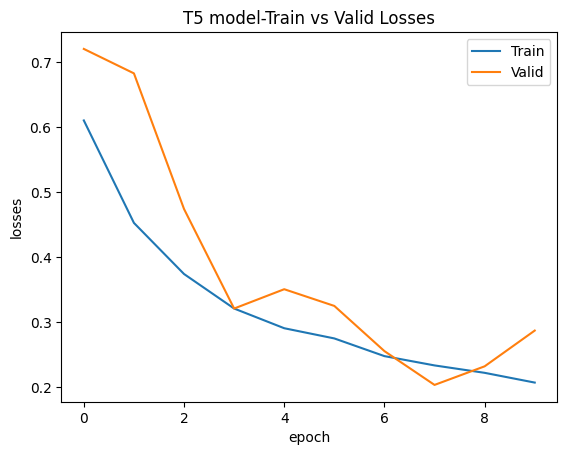

In [50]:
plt.plot(history['tr_loss'])
plt.plot(history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('T5 model-Train vs Valid Losses')

plt.show()

**Accuracy**

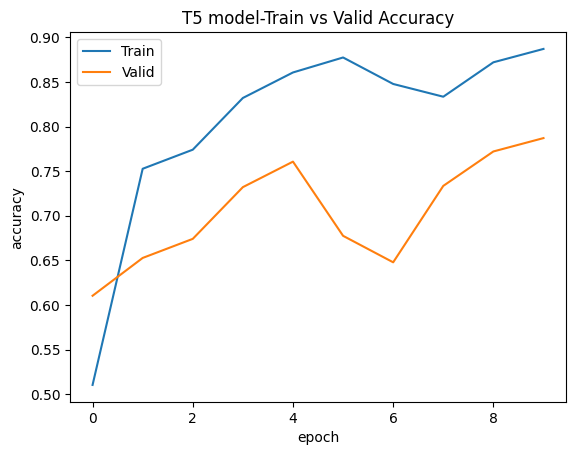

In [51]:
plt.plot(history['tr_acc'])
plt.plot(history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('T5 model-Train vs Valid Accuracy')

plt.show()

# **Interface :**

In [52]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.5 MB/s eta 0:00:00


In [53]:
import gradio as gr

In [55]:
appInp = gr.Textbox(lines=3, placeholder="Enter your sentence here...")

In [56]:
interface = gr.Interface(fn=gc.correctPara,inputs=appInp,outputs="text",title="Grammatical Error Correction")

In [57]:
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ad9266d27524d191b6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Saving the model :**

In [67]:
g_model.save('t5_model/')

Configuration saved in t5_model/config.json
Configuration saved in t5_model/generation_config.json
Model weights saved in t5_model/pytorch_model.bin
tokenizer config file saved in t5_model/tokenizer_config.json
Special tokens file saved in t5_model/special_tokens_map.json
Copy vocab file to t5_model/spiece.model


In [69]:
!zip -r 'gedr_t5.zip' 't5_model/'

  adding: t5_model/ (stored 0%)
  adding: t5_model/tokenizer_config.json (deflated 83%)
  adding: t5_model/special_tokens_map.json (deflated 86%)
  adding: t5_model/config.json (deflated 62%)
  adding: t5_model/generation_config.json (deflated 29%)
  adding: t5_model/pytorch_model.bin (deflated 8%)
  adding: t5_model/tokenizer.json (deflated 74%)
  adding: t5_model/spiece.model (deflated 48%)
